In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("PrePlacement.csv")

In [5]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
import seaborn as sns

In [8]:
#!pip install seaborn
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='ssc_p', ylabel='Density'>

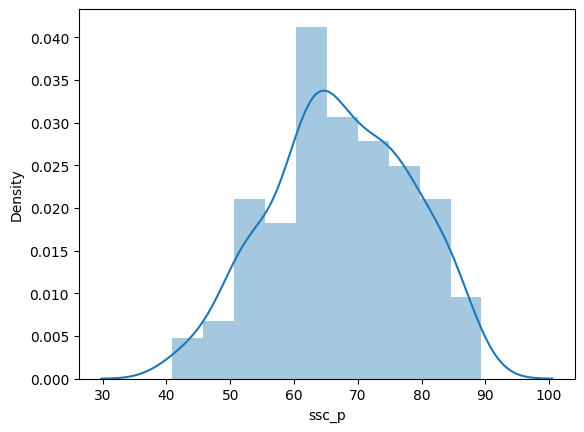

In [9]:
sns.distplot(dataset["ssc_p"])

In [10]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303, Standard Deviation=10.827
The area between range(35,40):0.0038825359644404514


0.0038825359644404514

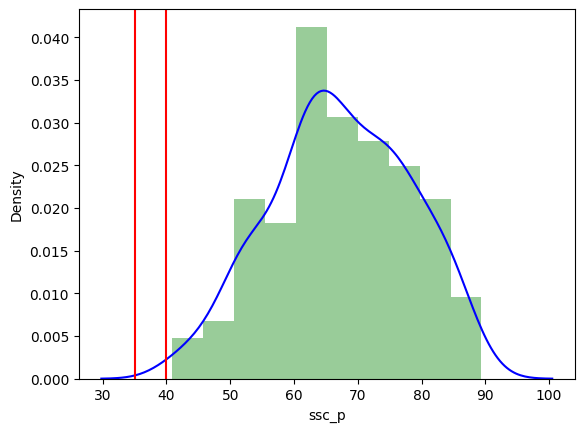

In [11]:
get_pdf_probability(dataset["ssc_p"],35,40)

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

0.8651162790697674

In [10]:
#!pip install statsmodels

In [32]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()

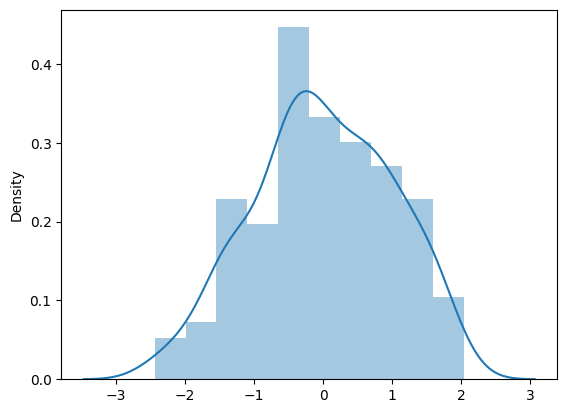

In [33]:
stdNBgraph(dataset["ssc_p"])